## Quick Data Understanding, Exploration and Visualization

We seek to visually represent the context of the tweets 

In [75]:
#importing requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib import figure

In [62]:
df=pd.read_csv('C:/Users/HP/Desktop/Sentiment Analysis On Tweets Mentioning Blood Sisters-A Netflix Movie/result.csv')

In [63]:
df

,2022-05-21 09:43:20+00:00,"b""@Frankdeburgh @HenshawKate She's just interpreting the mischief and meanness of Kola's Mom.\n#BloodSisters"""
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."
...,...,...
394,2022-05-23 19:52:57+00:00,"b""RT @NetflixNaija: In Sarah's world, Kola mak..."
395,2022-05-23 19:51:32+00:00,"b""RT @NetflixNaija: In Sarah's world, Kola mak..."
396,2022-05-23 19:46:59+00:00,b'Kehinde Bankole and Gabriel Afolayan power c...
397,2022-05-23 19:44:17+00:00,b'This show has been a wild ride. Willllllld! ...


In [64]:
#adding column titles
df.columns=['tweet_time','full_tweet']

In [65]:
df

,tweet_time,full_tweet
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."
...,...,...
394,2022-05-23 19:52:57+00:00,"b""RT @NetflixNaija: In Sarah's world, Kola mak..."
395,2022-05-23 19:51:32+00:00,"b""RT @NetflixNaija: In Sarah's world, Kola mak..."
396,2022-05-23 19:46:59+00:00,b'Kehinde Bankole and Gabriel Afolayan power c...
397,2022-05-23 19:44:17+00:00,b'This show has been a wild ride. Willllllld! ...


In [7]:
#checking quick attributes of the data

In [8]:
df.head(5)

,tweet_time,full_tweet
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."


In [9]:
df.tail(5)

,tweet_time,full_tweet
294,2022-05-21 03:37:29+00:00,b'RT @_deyemi: A nice pic with my fav characte...
295,2022-05-21 03:36:33+00:00,b'I am watching #BloodSisters as a companion t...
296,2022-05-21 03:31:59+00:00,b'#BloodSisters \n#NollywoodNigeria\n#Netflix ...
297,2022-05-21 03:22:51+00:00,b'RT @Officialglow_: #SaveTitilayoAyeni \n@mrm...
298,2022-05-21 02:48:18+00:00,b'RT @NetflixNaija: This friendship is thicker...


In [10]:
df.shape

(299, 2)

In [13]:
df.isnull().sum()

tweet_time    0
full_tweet    0
dtype: int64

In [12]:
#Cleaning the data and visualization to understand attributes of the data.

In [51]:
#importing requisite libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df1=pd.read_csv('C:/Users/HP/Desktop/Sentiment Analysis On Tweets Mentioning Blood Sisters-A Netflix Movie/result.csv')

In [19]:
df1.columns=('tweet_time','full_tweet')

In [67]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df1['full_tweet']]
df1["preprocess_txt"] = preprocess_tag
df1['word_count'] = df1['full_tweet'].apply(lambda x: len(str(x).split()))
df1['total_len'] = df1['preprocess_txt'].map(lambda x: len(x))
df1.head()

,tweet_time,full_tweet,preprocess_txt,word_count,total_len,pos_count,neg_count,sentiment
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...,"[b, rt, netflixnaija, friendship, thicker, wat...",20,20,0,0,0.0
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li...","[b, rt, iswispodcast, fk, jola, likely, kill, ...",15,24,0,0,0.0
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li...","[b, rt, iswispodcast, fk, jola, likely, kill, ...",15,24,0,0,0.0
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam...","[b, audition, supporting, cameo, role, one, eb...",30,24,0,0,0.0
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife...","[b, could, selected, next, ebonylife, studio, ...",24,33,0,0,0.0


In [29]:
#Visualization
import seaborn as sns

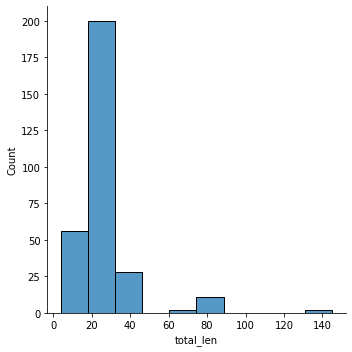

In [35]:
#distribution of length histogram
sns.displot(df1['total_len'], bins=10, kde=False)
plt.pyplot.savefig('Distribution Of Length.png')

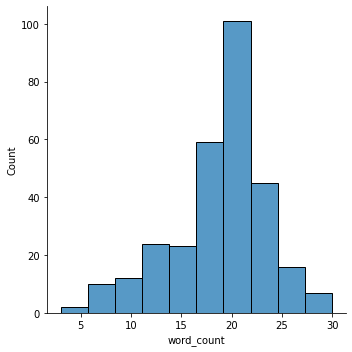

In [36]:
sns.displot(df1['word_count'], bins=10, kde=False)
plt.pyplot.savefig('Word Count Distribution')

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
text="".join(text for text in df1.full_tweet)
print("There are {} words in the combination of all tweets".format(len(text)))

There are 52145 words in the combination of all tweets


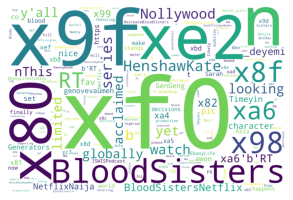

In [44]:
#Wordcloud to show most prominent words.
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Word Cloud of Tweets')
plt.show()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer


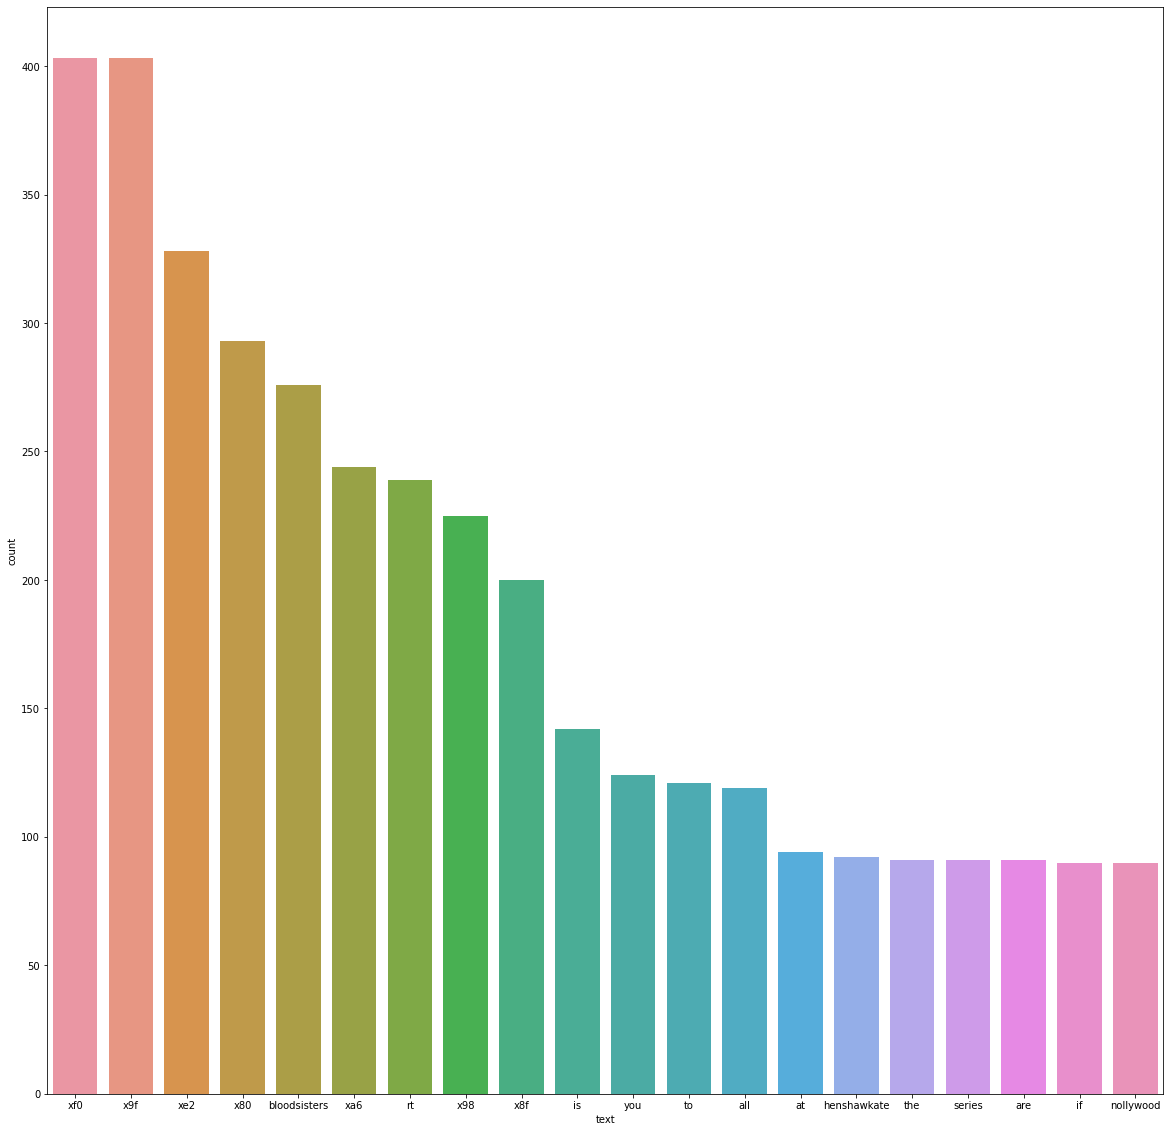

<Figure size 432x288 with 0 Axes>

In [81]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df1['full_tweet'], 20)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (20,20))
sns.barplot(x = "text", y = "count", data =df2)
plt.show()
plt.savefig('Unigrams Before Removing StopWords')

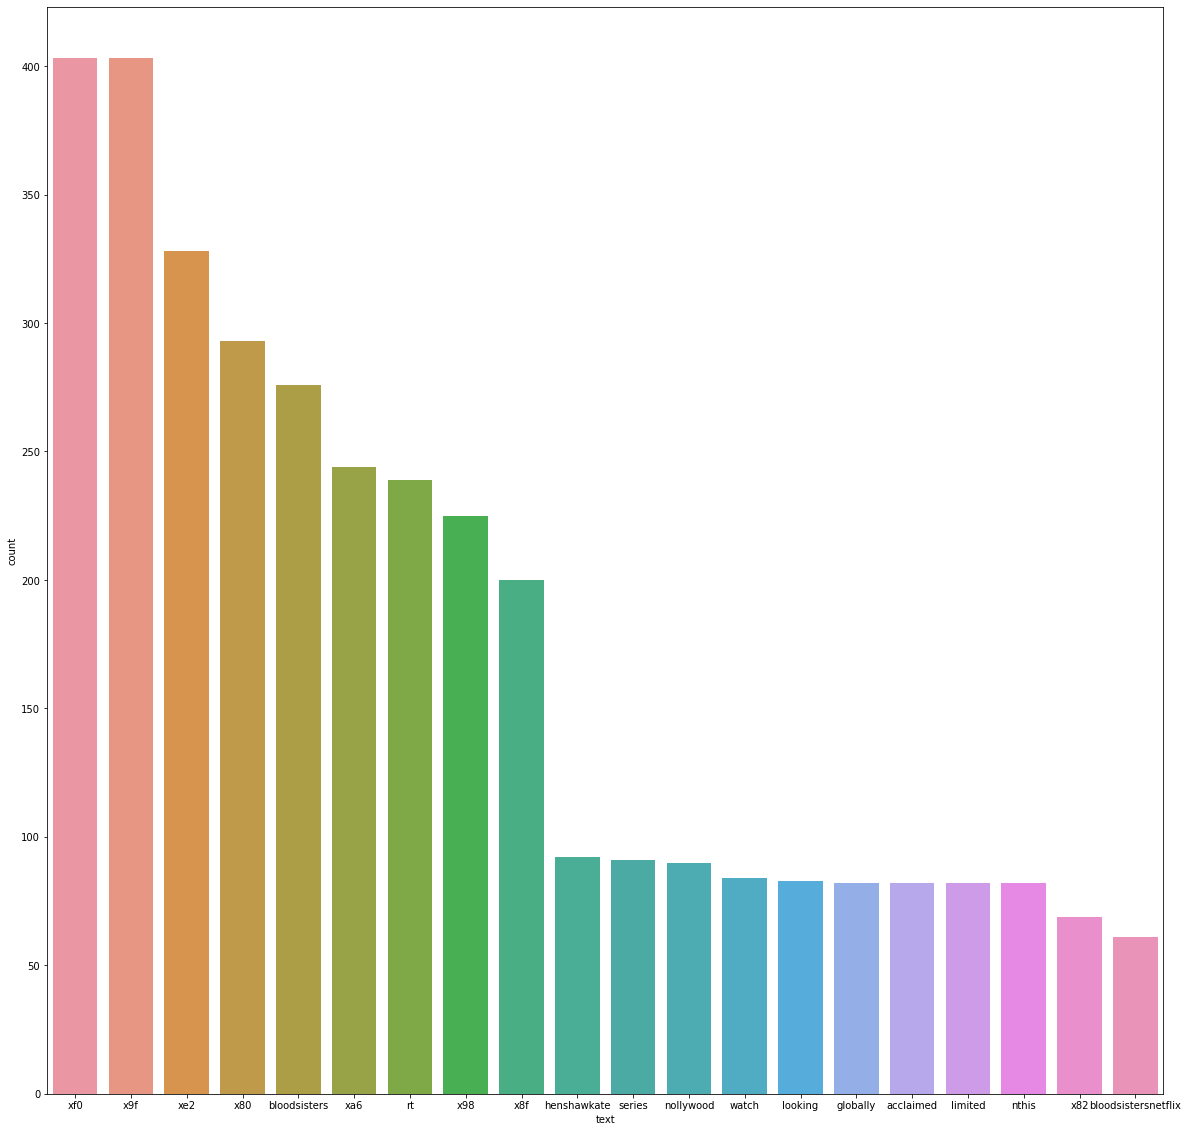

<Figure size 432x288 with 0 Axes>

In [83]:
#Unigrams after removing stopwords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df1['full_tweet'], 20)
#for word, freq in common_words:
    #print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (20,20))
sns.barplot(x = "text", y = "count", data =df3)
plt.show()
plt.savefig('Unigrams After Removing StopWords')

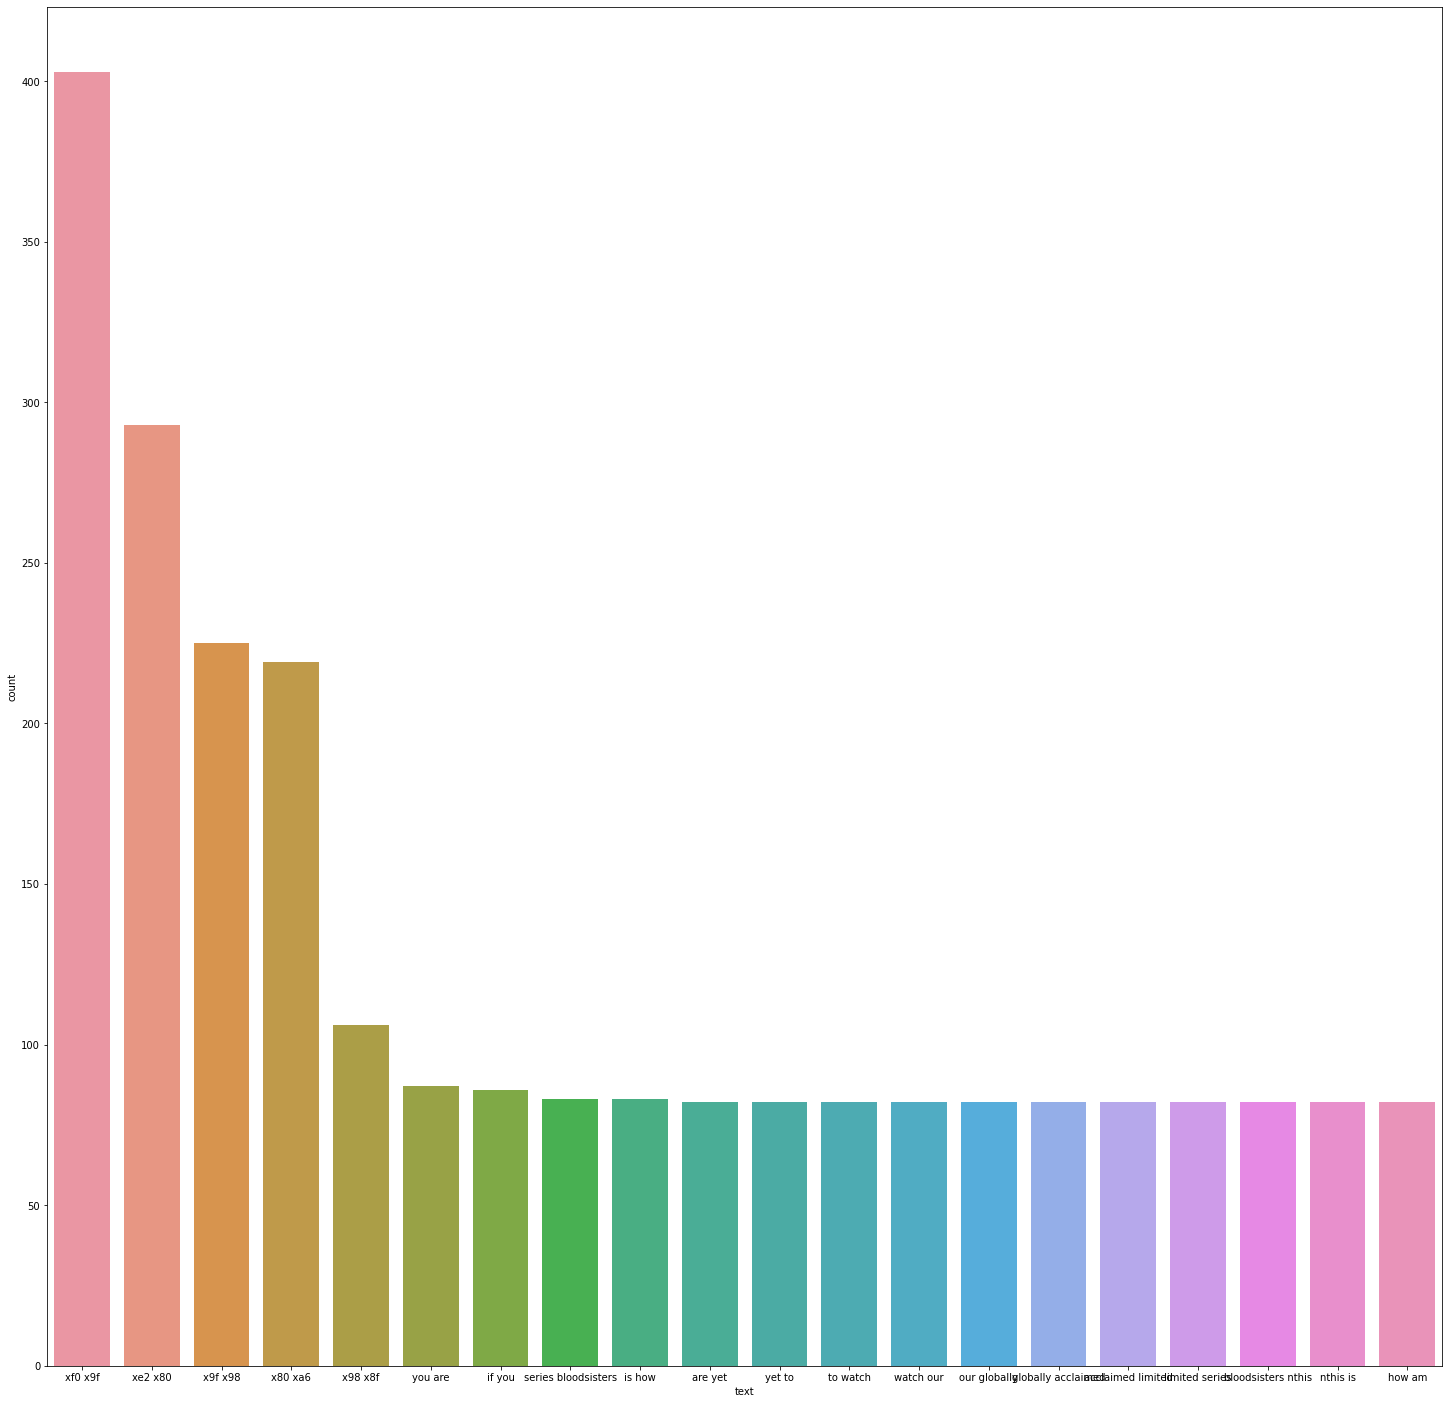

<Figure size 432x288 with 0 Axes>

In [92]:
#Bigrams
#1. Bigrams before removal of stopwords
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df1['full_tweet'], 20)
#for word, freq in common_words:
    #print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (25,25))
sns.barplot(x = "text", y = "count", data =df4)
plt.show()
plt.savefig('Bigrams Before Removing StopWords')

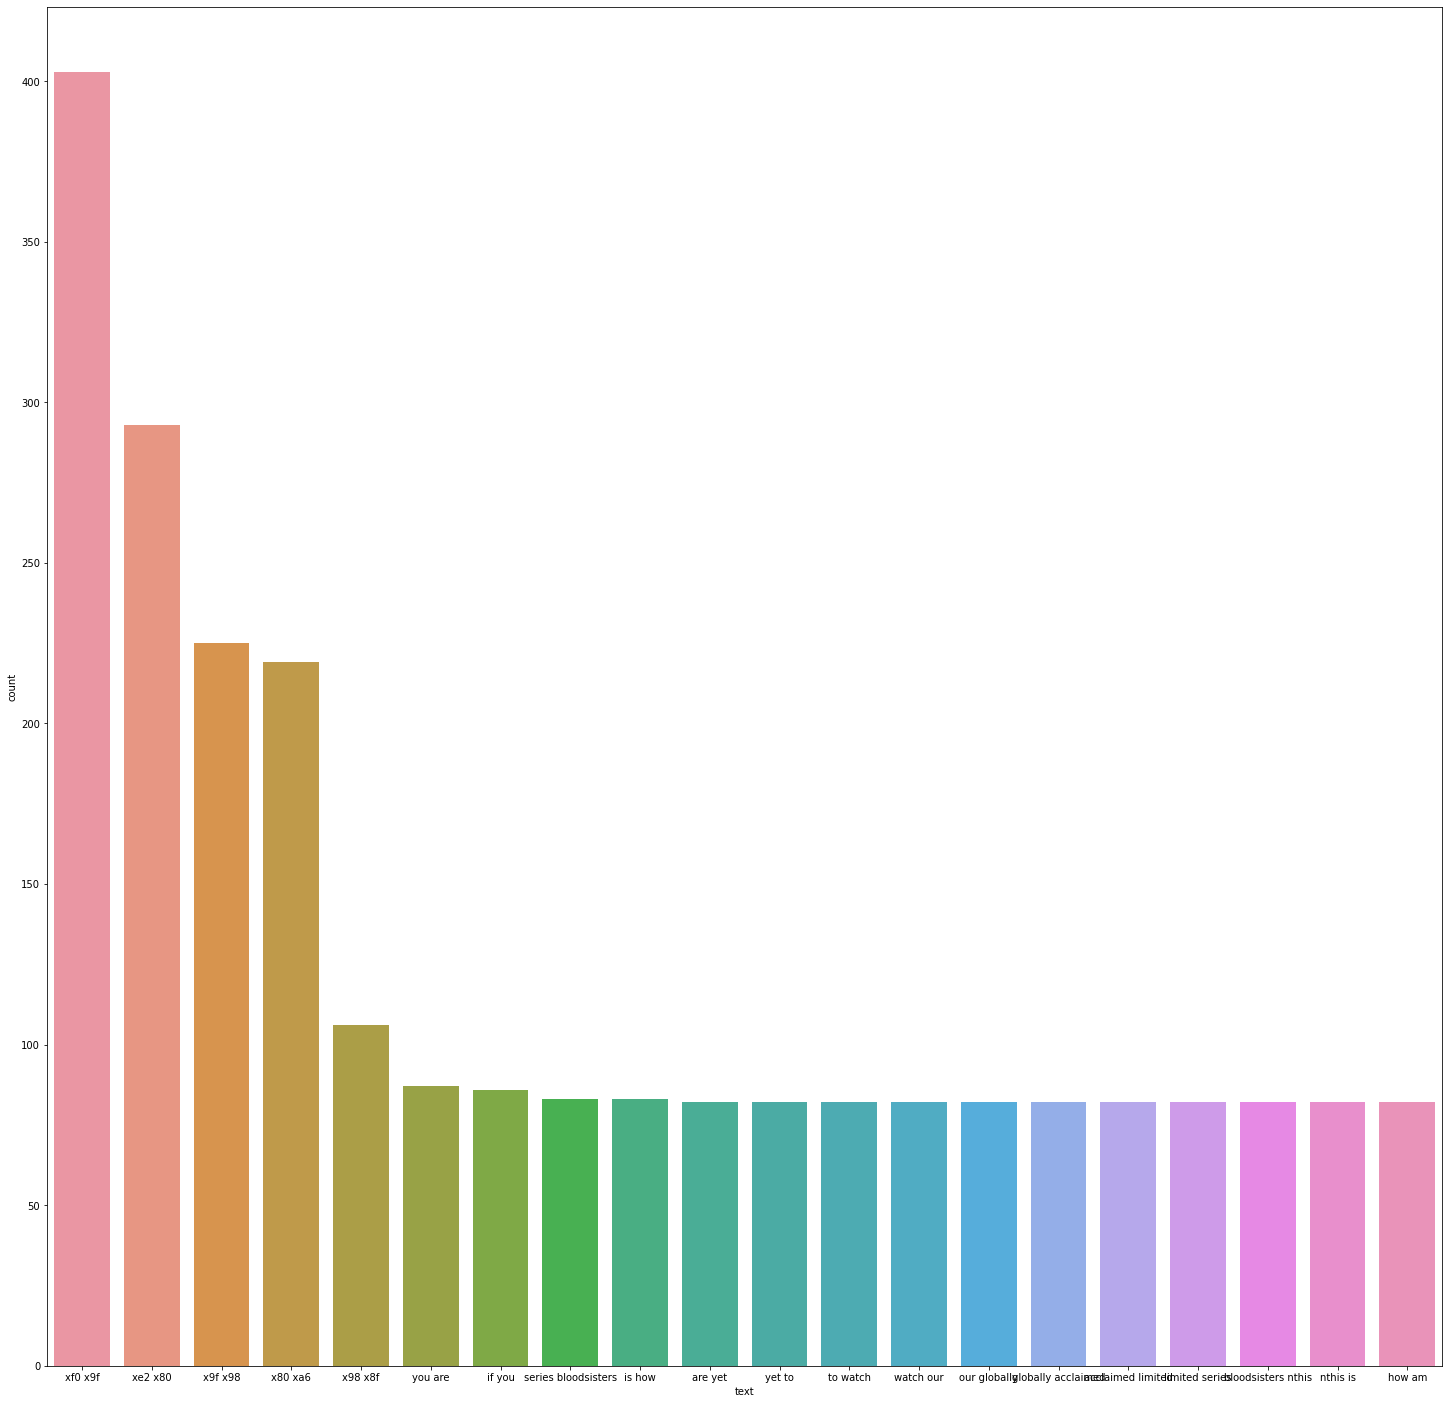

<Figure size 432x288 with 0 Axes>

In [91]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df1['full_tweet'], 20)
#for word, freq in common_words:
    #print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (25,25))
sns.barplot(x = "text", y = "count", data =df5)
plt.show()
plt.savefig('Bigrams After Removing StopWords')

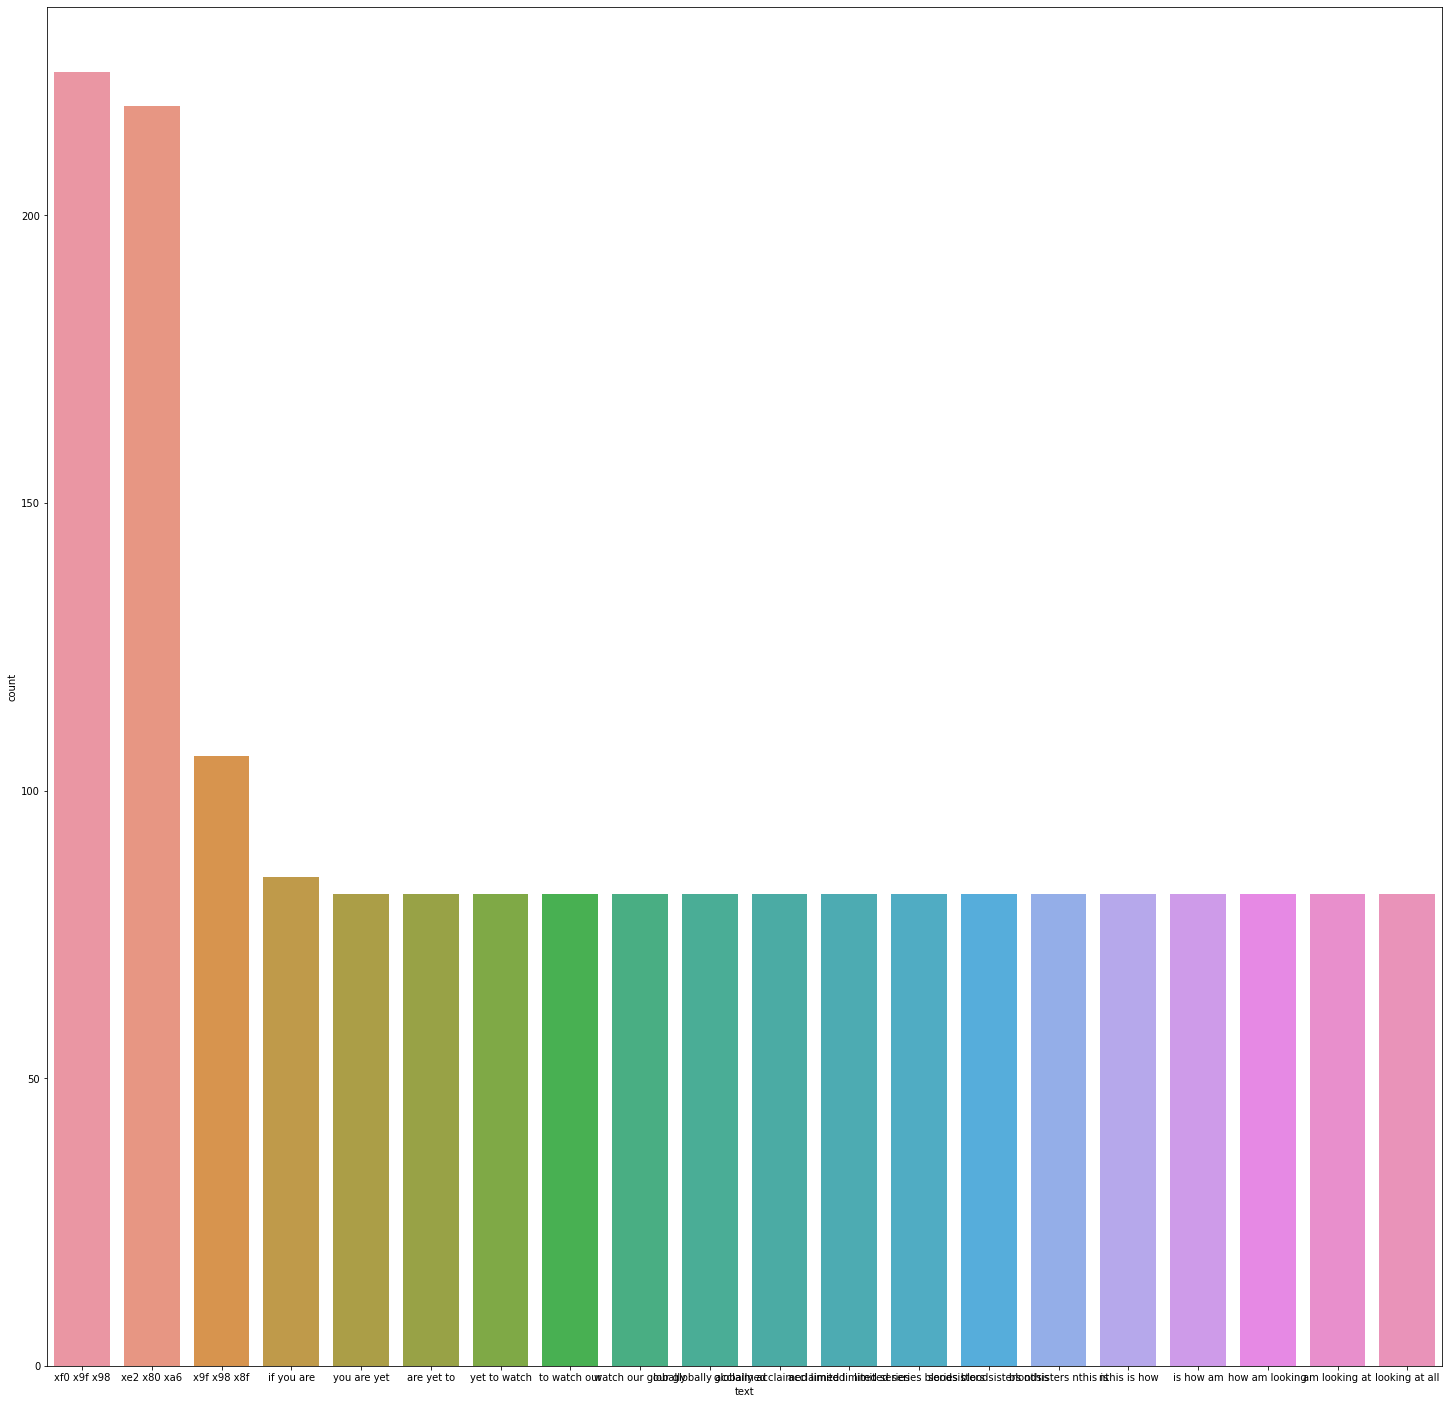

<Figure size 432x288 with 0 Axes>

In [90]:
#Trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df1['full_tweet'], 20)
#for word, freq in common_words:
 #   print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (25,25))
sns.barplot(x = "text", y = "count", data =df6)
plt.show()
plt.savefig('Trigrams Before Removing StopWords')

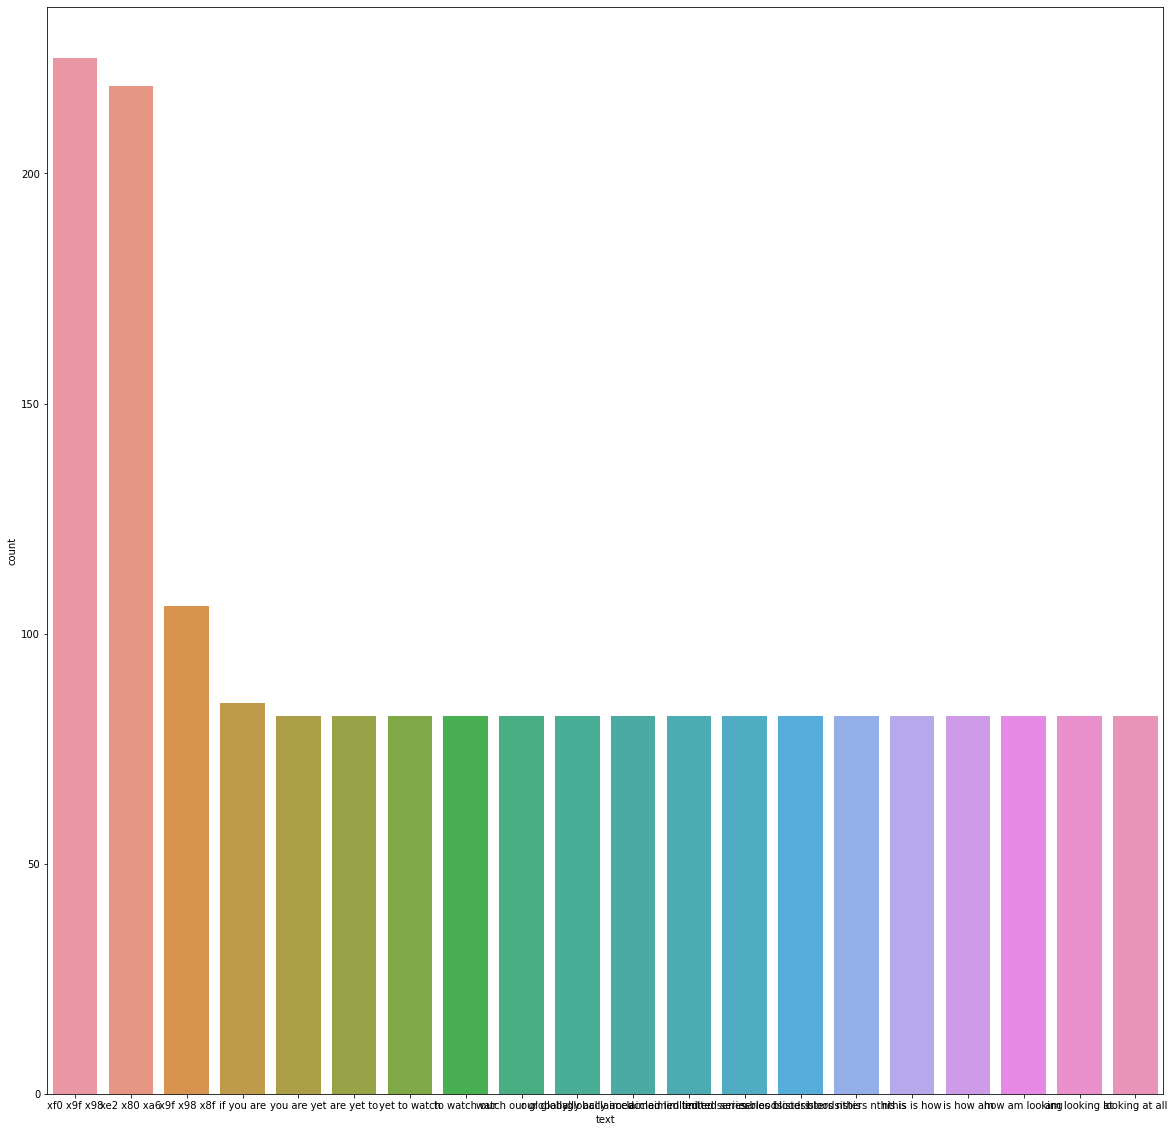

<Figure size 432x288 with 0 Axes>

In [94]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df1['full_tweet'], 20)
#for word, freq in common_words:
 #   print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize = (20,20))
sns.barplot(x = "text", y = "count", data =df6)
plt.show()
plt.savefig('Trigrams After Removing StopWords')

In [ ]:
#Using TextBlob API for Parts of Speech.
